## Beispiel einer Fourier-Darstellung von einer Funktion

In [1]:
# Bevor wir anfangen, lass und ein Paar Module importieren
import numpy as np
import matplotlib.pyplot as plt

Wir diskretisieren den eindimensionalen Raum $x = [0, L)$ mit $n$ diskreten Koordinaten $x_i = i  \frac{L}{n}$, wobei $i=0, \cdots ,n-1$, welche wir in den Vektor $\mathbf{x} = \{ x_0, x_1, \cdots, x_{n-1} \}$ speichern. Wir wählen $n$ als eine ungerade ganze Zahl. 

In [2]:
# ein Array von Raumkoordinate wird definiert 
n = 11                         # Anzahl von Punkten (bitte ungerade ganze Zahl)
L = 1                          # Länge des Gebietes
x = L*np.arange(0,n)/n         # Vektor der Koordinaten 


Wir definieren im Gebiet $x = [0, L)$ eine periodische Funktion. Wir wählen die Sinuswelle 

$$ f = A \sin (k x) \,\, ,$$ 

wobei $A$ die Amplitude und $k=2\pi / \lambda$ die Wellenzahl und $\lambda$ die Wellenlänge ist. Wir setzten beispielsweise die Amplitude der Welle als $A=1$ und die Wellenlänge als $\lambda=L$, so dass die Wellenlänge gerade der gesamten Länge des Gebiets entspricht. Es ergibt sich eine Wellenzahl $k=2\pi / L$. 

Natürlich wird die Funktion $f$ als diskrete Funktionswerte $f_i$ an den Stellen $x_i$ in den Vektor $\mathbf{f} = \{ f_0, f_1, \cdots, f_{n-1} \}$ gespeichert. 

In [3]:
# ein Array von Funktionswerte wird definiert
k = 2 * np.pi / L
f = np.sin(k*x)

Wir nehmen jetzt die diskrete Fourier-Transformation der diskreten Funktion $f_i$. Indem wir es tun, drücken wir die diskrete Funktion $f_i$ als Summe einzelner Fourier-Wellen wie folgt aus:

\begin{equation}
     f_i = \sum_{j=-n/2}^{n/2} \hat{f_j} \, e^{I j k x_i } \,\,\,, \qquad \qquad (\mathrm{P}\,2.1)
     \label{eq:1}
\end{equation}

wobei $I=\sqrt{-1}$ die imaginäre Einheit ist und  $e^{I j k x }$ sich durch die Euler'sche Formel auch als $e^{I j k x } = \cos(j k x)  + I \sin(j k x) $  ausdrücken lässt. Der Index $j$ entspricht der $j$-te Welle dar. Die $j$-te Welle hat eine Wellenzahl $k_j= j k$, also eine Wellenlänge $ \lambda_j = \frac{2 \pi}{j k} = L/j $. Die $n$ Fourier-Koeffizienten $\hat{f_j}$ sind das Resultat der diskreten Fourier-Transformation und werden in dem Vektor $\mathbf{F}$ gespeichert. Die Fourier-Koeffizienten drücken die Amplitude und Phasenlage jeder Welle aus. 

In [4]:
# die fuktion f wird Fourier-transformiert
F = np.fft.fft(f,norm='forward')
# weger numrischer Optimierung gibt die Funktion fft 
# eine Reihenfolge der Fourier-Koeffizienten zurück,
# welche Gleichung P2.1 nicht entspricht. 
# Um die richtige Reihenfolge zu erhalten, benutzten wir
# die Funktion fftshift
F = np.fft.fftshift(F)

# wir stellen einen Vektor der Wellenzahlen k_j her
k_j = np.arange(-n//2+1,n//2+1)*k
# und einen Vektor der Indizes j
j = np.arange(-n//2+1,n//2+1)
# wir brauchen diese gleich zum Plotten

Jetzt können wir den reellen und imaginären Anteil der Fourier-Koeffizienten in einem Diagramm darstellen

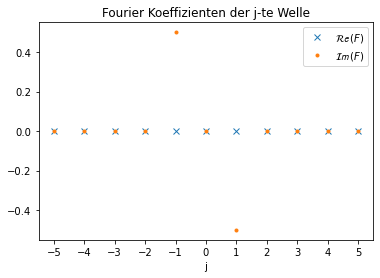

In [5]:
plt.figure()
plt.title('Fourier Koeffizienten der j-te Welle')
plt.plot(j,np.real(F),'x',label=r'$\mathcal{Re}\,(F)$')
plt.plot(j,np.imag(F),'.',label=r'$\mathcal{Im}\,(F)$')
plt.gca().set_xticks(j) # This will show one tick for on the x-axis for each j
plt.xlabel('j')
plt.legend()
plt.show()